In [1]:
import pandas

In [2]:
kittens = pandas.Series(data=[1,3,4,2])
happiness = pandas.Series(data=[2,6,7,4])

In [3]:
df = pandas.DataFrame({
        'kittens': kittens,
        'happiness': happiness
    })
df

,happiness,kittens
0,2,1
1,6,3
2,7,4
3,4,2


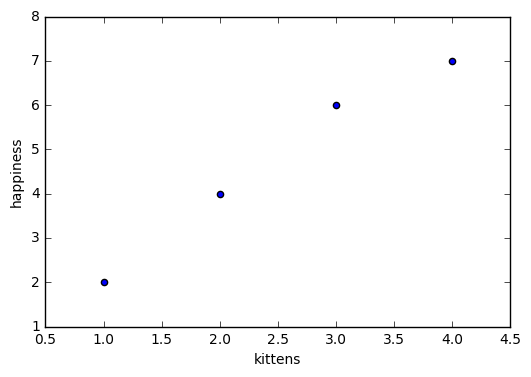

In [5]:
%matplotlib inline
df.plot.scatter('kittens', 'happiness')

In [6]:
import sklearn.linear_model

In [38]:
regressor = sklearn.linear_model.TheilSenRegressor()

In [39]:
X = df[  ["kittens"] ]
y = df.happiness

In [40]:
X

,kittens
0,1
1,3
2,4
3,2


In [41]:
y

0    2
1    6
2    7
3    4
Name: happiness, dtype: int64

In [42]:
regressor.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [43]:
regressor.predict([ [1], [2]  ])

array([ 2.0169306 ,  3.99292199])

In [44]:
regressor.predict([   [10]   ])

array([ 19.8008531])

In [45]:
regressor.coef_

array([ 1.97599139])

In [46]:
regressor.intercept_

0.040939212419844717

# Sacramento House Prices

We will predict prices based on:
* Bedrooms
* Bathrooms
* Other stuff

In [47]:
sacramento = pandas.read_csv('../../data/Sacramento-real-estate-transactions.csv')

In [48]:
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [49]:
ransac = sklearn.linear_model.RANSACRegressor()

In [50]:
X = sacramento[   ['beds', 'baths', 'sq__ft', 'latitude', 'longitude', 'zip']    ]
y = sacramento.price

In [ ]:
ransac.fit(X, y)

In [52]:
ransac.estimator_.coef_

array([-29638.95458599,   8952.4271295 ,    162.31578664,  17049.11494325,
        86883.6830495 ,   -277.93043112])

In [53]:
"%.2d" % (1.1e+04)

'11000'

In [54]:
ransac.estimator_.intercept_

36543414.667010143

In [56]:
ols = sklearn.linear_model.LinearRegression()

In [57]:
X = sacramento[   ['beds', 'baths', 'sq__ft']    ]
y = sacramento.price

In [58]:
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
ols.coef_

array([ -8.01164405e+03,   6.18961061e+04,   1.93133645e+01])

In [60]:
ols.intercept_

122108.40091355302

In [64]:
["%.2f" % (c,) for c in ols.coef_]

['-8011.64', '61896.11', '19.31']

In [65]:
predictions = ols.predict(X)
predictions

array([ 184127.19166465,  182508.2712587 ,  183354.6570853 ,
        184436.20549639,  183373.97044978,  181639.16985693,
        243187.63543901,  182701.40490354,  248051.20107826,
        243998.79674734,  239421.52936465,  246760.60786854,
        192814.80347171,  179669.20667957,  249615.58360146,
        251778.68042366,  184281.69858052,  183335.34372081,
        179337.47727264,  248054.60328896,  243458.02254179,
        239521.49839777,  237802.6089587 ,  252786.37758752,
        239267.02244878,  242878.62160727,  178568.34490398,
        243477.33590627,  240506.47998645,  245968.7599247 ,
        249943.91079768,  244114.67693424,  248518.12403657,
        243419.39581282,  249943.91079768,  249252.03188696,
        242762.74142037,  242283.30951897,  235987.15269721,
        190671.020014  ,  255061.95238592,  245176.91198086,
        242260.59394379,  250021.16425562,  244504.34643462,
        173588.89907783,  244369.15288323,  189715.5584219 ,
        245836.96858401,

In [66]:
import matplotlib.pyplot

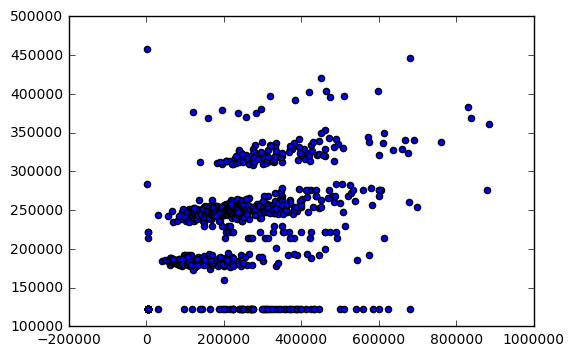

In [67]:
matplotlib.pyplot.scatter(sacramento.price, predictions)

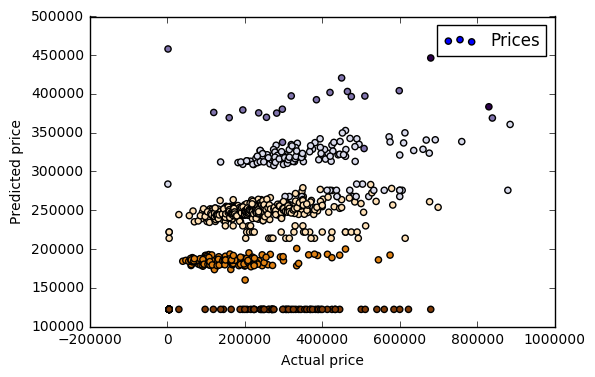

In [75]:
(fig, ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price, predictions,
                          cmap=matplotlib.pyplot.cm.PuOr,
                          c=sacramento.baths, label="Prices")
ax.set_xlabel("Actual price")
ax.set_ylabel("Predicted price")
ax.legend(loc='best')

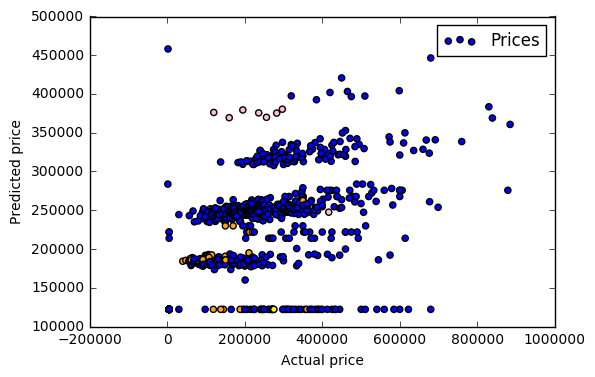

In [78]:
def colorme(x):
    if x == 'Residential': return 'blue'
    if x == 'Condo': return 'orange'
    if x == 'Multi-Family': return "pink"
    return "yellow"
(fig, ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price, predictions,
                          c=sacramento.type.map(colorme), label="Prices")
ax.set_xlabel("Actual price")
ax.set_ylabel("Predicted price")
ax.legend(loc='best')

In [77]:
sacramento.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)